### Day 1 - Generating and Testing Random Numbers

To do:
- [] Exercise 1
    - [] Using built-in functions
    - [] $\chi^2$ by hand
    - [] KS by hand
- [] Exercise 2

#### Exercise 1


--------
- Implementation of Linear Congruential Generator (LCG) (only integer representation)

**a) Generating 10,000 random numbers and presenting in a histogram**

In [15]:
import matplotlib.pyplot as plt
import math
import copy
import scipy.stats as stat

In [5]:
# Implementation of LCG as a generator
def LCG(M, a, c, seed, size):
    for i in range(size):
        seed = (a*seed+c)%M
        yield seed


# Determining parameters - ensure maximum cycle length

M = 127
a = 17
c = 1
seed = 46

num_lst = list(LCG(M, a, c, seed, 10000))

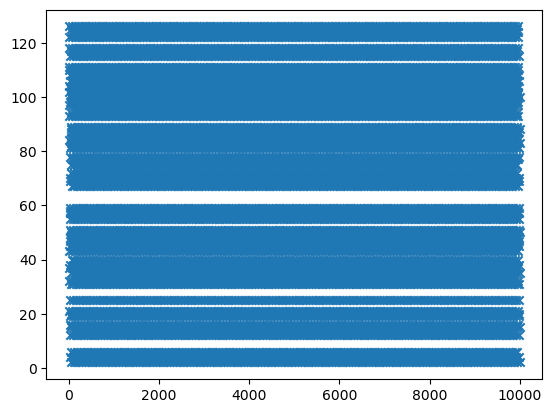

In [6]:
plt.scatter([i for i in range(10000)], num_lst, marker="x")
plt.show()

In [7]:
# Setting number of classes
num_classes = 10
# checking range of random numbers
print(f"Minimum random number: {min(num_lst)}")
print(f"Maximum random number: {max(num_lst)}")


Minimum random number: 2
Maximum random number: 126


Range of values: $\Delta x = 126 - 2 = 124$

$\therefore$ class sizes will be $\lfloor\frac{124}{10}\rfloor = 12$

numbers will be partitioned via the following: $[2+(j-1) \cdot 12, \ 2+j \cdot 12[$

**(not used)**

In [8]:
bins = {i: 0 for i in range(1, 11)}
cpy_num_lst = copy.copy(num_lst)

for j in range(1, num_classes+1):
    low = 2+(j-1)*12
    high = (2+j*12)-1
    for num in cpy_num_lst:
        if num >= low and num < high:
            bins[j]+=1


Creating histogram

Text(0.5, 0, 'Value')

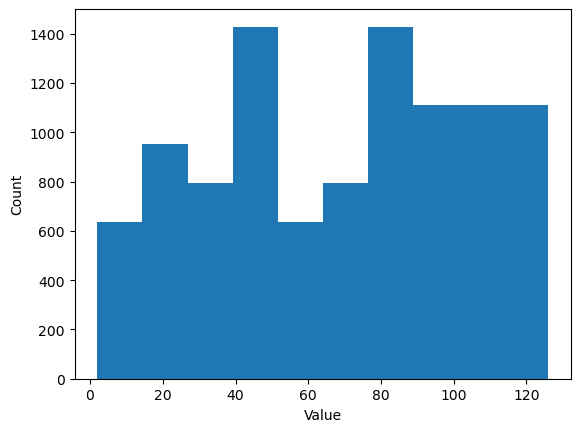

In [12]:
plt.hist(num_lst)
plt.ylabel("Count")
plt.xlabel("Value")

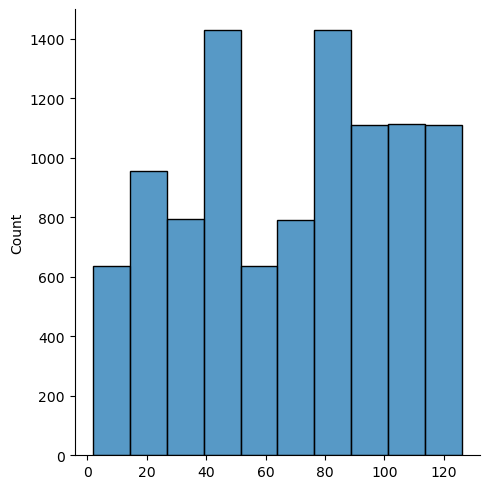

In [13]:
import seaborn as sns
sns.displot(num_lst, bins=10)

**b)  Evaluate the quality of the generator by graphical descriptive statistics (histograms, scatter plots) and statistical tests - $\chi^2$,Kolmogorov-Smirnov, run-tests, and correlation test.**

Graphical descriptive statistics:
- LCG clearly does not generate truly random numbers. Clearly show in scatter plot; large *bands* of values present where cycle repeats.
    - Also shown in histogram. Counts for each *bin* are not uniformly distributed, but appear to exhibit a slight positive skew (will be shown by linear regression).
#### Evaluating Distribution
- 1: $\chi^2$ test
- 2: Kolmogorov-Smirnov test

Proceeding with $\chi^2$ test:

$H_0$: The distribution is uniform.

$\alpha = 0.05$

In [29]:
n_expected = 1000

test_stat = 0

for _, count in zip(bins.keys(), bins.values()):
    test_stat += ((count-n_expected)**2)/(n_expected)

print(f"Calculated test statistic: {test_stat}")

chi_stat, p_val = stat.chisquare(list(bins.values()))
print(f"Chi-squared test statistic: {chi_stat}\nP-value: {p_val}")


Calculated test statistic: 767.4570000000001
Chi-squared test statistic: 657.6742097282166
P-value: 8.63538015991093e-136


At a significance level of 5%, the null hypothesis is clearly rejected. The distribution is not uniform.

Now proceeding with the Kolmogorov Smirnov test:
- $H_0$: Distribution is uniform

In [32]:
x = stat.kstest(num_lst, "uniform")
print(x)

KstestResult(statistic=1.0, pvalue=0.0)


Reject null hypothesis